In [70]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

Data source: https://public.opendatasoft.com/explore/dataset/georef-france-commune/

In [2]:
georef = gpd.read_file('georef-france-commune.geojson')
print(georef.head())

        com_name_upper bv2012_code com_siren_code               arrdep_name  \
0          VILLESISCLE       11049      211104385               Carcassonne   
1                AUBIN       12089      211200134  Villefranche-de-Rouergue   
2  BALAGUIER-SUR-RANCE       12208      211200191                    Millau   
3         LA CAVALERIE       12145      211200639                    Millau   
4  CLAIRVAUX-D'AVEYRON       12138      211200662                     Rodez   

  ept_code com_type com_uu2020_code   reg_name       bv2012_name com_code  \
0     None  commune           11000  Occitanie              Bram    11438   
1     None  commune           12302  Occitanie       Decazeville    12013   
2     None  commune           12000  Occitanie    Saint-Affrique    12019   
3     None  commune           12000  Occitanie            Millau    12063   
4     None  commune           12000  Occitanie  Marcillac-Vallon    12066   

   ... arrdep_code          ze2020_name com_area_code reg_code

In [28]:
georef.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 34968 entries, 0 to 34967
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   com_name_upper        34968 non-null  object  
 1   bv2012_code           34955 non-null  object  
 2   com_siren_code        34955 non-null  object  
 3   arrdep_name           34826 non-null  object  
 4   ept_code              130 non-null    object  
 5   com_type              34968 non-null  object  
 6   com_uu2020_code       34955 non-null  object  
 7   reg_name              34968 non-null  object  
 8   bv2012_name           34955 non-null  object  
 9   com_code              34968 non-null  object  
 10  com_current_code      34968 non-null  object  
 11  com_cateaav2020_code  34955 non-null  object  
 12  ept_name              130 non-null    object  
 13  dep_code              34968 non-null  object  
 14  com_name              34968 non-null  object  

In [38]:
climatic_zone_detailed = pd.read_csv('zone_climatique.csv', index_col=[0]).to_dict()['Zone Climatique']
detailed_to_agg = {'H1A': 'H1', 'H1B': 'H1', 'H1C': 'H1', 'H2A': 'H2', 'H2B': 'H2', 'H2C': 'H2', 'H2D': 'H2', 'H3': 'H3'}
climatic_zone = {k: detailed_to_agg[item] for k, item in climatic_zone_detailed.items()}

In [47]:
# create int column with departement code
georef['dep_code_modified'] = georef['dep_code'].replace({'2A': 2, '2B': 2})
georef['dep_code_modified'] = georef['dep_code_modified'].astype(int)

In [77]:
# climatic zone
georef['climatic_zone'] = georef['dep_code_modified'].replace(climatic_zone)
georef['climatic_zone_detailed'] = georef['dep_code_modified'].replace(climatic_zone_detailed)

georef = georef[georef['climatic_zone'].isin(['H1', 'H2', 'H3'])]

In [95]:
# define climatic zone
unions = dict()
for i in ['H1', 'H2', 'H3']:
    s = georef.loc[georef['climatic_zone'] == i, 'geometry']
    unions.update({i: gpd.GeoSeries(s.unary_union)})

In [96]:
color = {'H1': 'blue', 'H2': 'green', 'H3': 'yellow'}

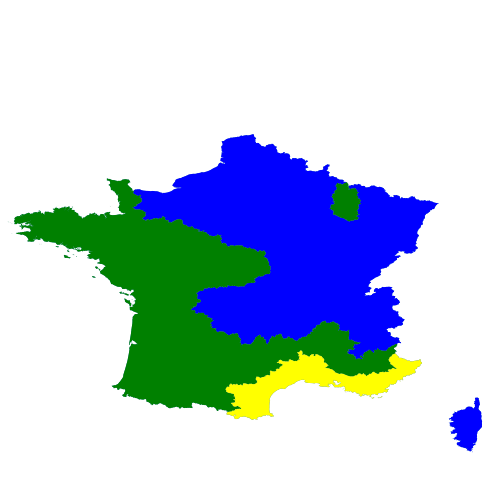

In [97]:
# plot climatic zone
fig, ax = plt.subplots(figsize=(16, 9))
georef.plot(ax=ax)
for k, union in unions.items():
    union.plot(ax=ax, color=color[k])
ax.set_axis_off()
ax.set_xlim(xmin=-5, xmax=10)
ax.set_ylim(ymin=40, ymax=55)

plt.show()

In [ ]:
# calculate distance for each commune to the climatic zone border